# Box-Muller Normals  

This notebook implements the Box-Muller algorithm in Python to simulate a pair of independent standard normal variables. The implementation replicates the content of the article **'A Note on the Generation of Random Normal Deviates'** by G. E. P. Box and Mervin E. Muller. The libraries used are `numpy` and `scipy`.


In [2]:
import numpy as np

def BoxMullerFunction(u1, u2):
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z1, z2

# Generate Box-Muller normals
target_samples = 10000
number_samples = 0

z1_samples = []
z2_samples = []

while number_samples < target_samples:
    u1 = np.random.uniform(0, 1)
    u2 = np.random.uniform(0, 1)

    z1, z2 = BoxMullerFunction(u1, u2)

    z1_samples.append(z1)
    z2_samples.append(z2)

    number_samples += 1




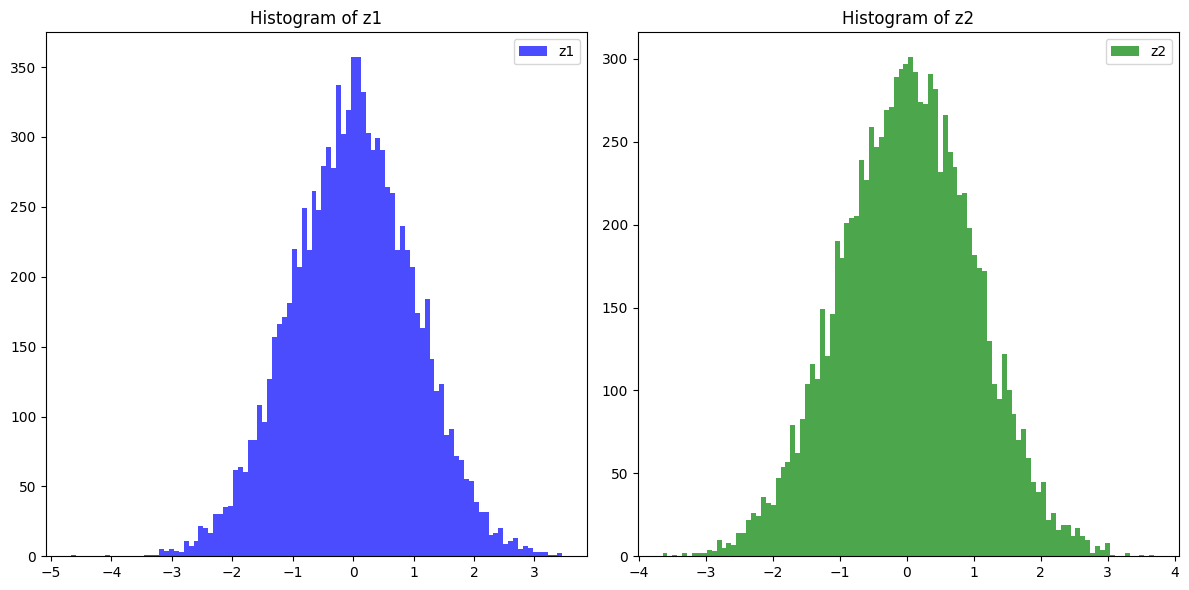

In [3]:
import matplotlib.pyplot as plt

# Plot histograms for z1 and z2
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(z1_samples, bins=100, color='blue', alpha=0.7, label='z1')
plt.title('Histogram of z1')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(z2_samples, bins=100, color='green', alpha=0.7, label='z2')
plt.title('Histogram of z2')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
from scipy.stats import shapiro

z1_stat, z1_p = shapiro(z1_samples)
z2_stat, z2_p = shapiro(z2_samples)

print(f"Shapiro-Wilk test for z1: W={z1_stat:.3f}, p={z1_p:.3f}")
print(f"Shapiro-Wilk test for z2: W={z2_stat:.3f}, p={z2_p:.3f}")

if z1_p > 0.05 and z2_p > 0.05:
    print("We cannot reject the hypothesis that z1 and z2 are normally distributed!")
else:
    print("At least one of z1 or z2 is not normally distributed.")


Shapiro-Wilk test for z1: W=1.000, p=0.454
Shapiro-Wilk test for z2: W=1.000, p=0.604
We cannot reject the hypothesis that z1 and z2 are normally distributed!


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


### Bibliography:

Box, G. E. P., & Muller, M. E. (1958). *A Note on the Generation of Random Normal Deviates*. Annals of Mathematical Statistics, 29, 610–611. [Link](https://api.semanticscholar.org/CorpusID:119971394)
